In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from pylab import rcParams
%matplotlib inline

data = pd.read_csv('Telco-Customer-Churn.csv')

## Exploration and feature selection

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
sizes = data['Churn'].value_counts(sort=True)

In [5]:
colors = ["grey", "purple"]
rcParams['figure.figsize'] = 5,5

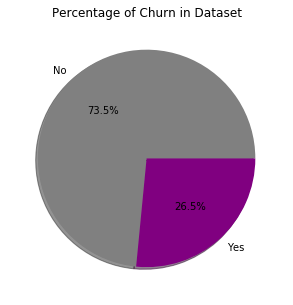

In [6]:
#Plot
plt.pie(sizes, colors = colors, labels = ['No', 'Yes'], autopct='%1.1f%%', shadow=True, )
plt.title('Percentage of Churn in Dataset')
plt.show()

## Data Preparation and Feature Engineering

### Dropping irrelevant columns

In [7]:
data.drop(['customerID'], axis = 1, inplace=True)

### Converting numerical features from object

In [8]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [11]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'])

In [10]:
data['TotalCharges'] = data['TotalCharges'].replace(' ', '0')

In [12]:
data=data.drop(488)

### Converting categorical data to numerical

In [13]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [14]:
services = ['PhoneService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling']

In [15]:
data[services]

,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling
0,No,No,Yes,No,No,No,No,Yes
1,Yes,Yes,No,Yes,No,No,No,No
2,Yes,Yes,Yes,No,No,No,No,Yes
3,No,Yes,No,Yes,Yes,No,No,No
4,Yes,No,No,No,No,No,No,Yes
5,Yes,No,No,Yes,No,Yes,Yes,Yes
6,Yes,No,Yes,No,No,Yes,No,Yes
7,No,Yes,No,No,No,No,No,No
8,Yes,No,No,Yes,Yes,Yes,Yes,Yes
9,Yes,Yes,Yes,No,No,No,No,No


In [16]:
print(data[x].value_counts(sort=True) for x in services)

<generator object <genexpr> at 0x1a23b41750>


In [17]:
for x in services:
    print(data[x].value_counts(sort=True))

Yes    6361
No      681
Name: PhoneService, dtype: int64
No                     3498
Yes                    2018
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3087
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2421
No internet service    1526
Name: DeviceProtection, dtype: int64
No                     3473
Yes                    2043
No internet service    1526
Name: TechSupport, dtype: int64
No                     2810
Yes                    2706
No internet service    1526
Name: StreamingTV, dtype: int64
No                     2784
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64
Yes    4170
No     2872
Name: PaperlessBilling, dtype: int64


In [21]:
data = pd.get_dummies(data)

In [22]:
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', '

In [23]:
drop_columns = ['gender_Female', 'Partner_No', 'Dependents_No', 'PhoneService_No', 
                'MultipleLines_No', 'InternetService_No', 'OnlineSecurity_No', 'OnlineBackup_No', 
                'DeviceProtection_No', 'TechSupport_No', 'StreamingTV_No', 'StreamingMovies_No', 
                'Contract_Month-to-month', 'PaperlessBilling_No', 'PaymentMethod_Mailed check', 'Churn_No']

In [24]:
data = data.drop(drop_columns, axis = 1)

In [25]:
data

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,Churn_Yes
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,1
5,0,8,99.65,820.50,0,0,0,1,0,1,...,1,0,1,0,0,1,0,0,1,1
6,0,22,89.10,1949.40,1,0,1,1,0,1,...,1,0,0,0,0,1,0,1,0,0
7,0,10,29.75,301.90,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,0,28,104.80,3046.05,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,1,1
9,0,62,56.15,3487.95,1,0,1,1,0,0,...,0,0,0,1,0,0,1,0,0,0


In [26]:
Y = data['Churn_Yes']
X = data.iloc[:, :-1]

## Split the data

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)

## Training the data

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [31]:
from sklearn import metrics
prediction_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, prediction_test))

0.8190205819730305
